# PennyLane Search Exploratory Data Analysis

We will be exploring a dataset regarding the recent searches from PennyLane.ai/search. We will start by loading the data and getting a general idea of what kinds of data are including in the dataset.

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#read in csv file of search data
df=pd.read_csv('/Users/lindsaybabcock/Documents/Work/Applications/Xanadu/search_analytics.csv')

In [2]:
#Change column to datetime types
df['created_at']=pd.to_datetime(df['created_at'],
               format='%Y-%m-%d %H:%M:%S.%f')

#take a look at data types/data 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220524 entries, 0 to 220523
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id                    220524 non-null  object             
 1   created_at            220524 non-null  datetime64[ns, UTC]
 2   query_text            19596 non-null   object             
 3   total_results         220524 non-null  int64              
 4   search_parameters     220524 non-null  object             
 5   query_content_types   220456 non-null  object             
 6   response_content_ids  220524 non-null  object             
 7   role                  576 non-null     object             
 8   survey                3095 non-null    object             
 9   personas              3095 non-null    object             
 10  persona_other         112 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(1), object(9)
memor

,id,created_at,query_text,total_results,search_parameters,query_content_types,response_content_ids,role,survey,personas,persona_other
0,04c0a197-0cbc-4bca-b5d4-c6134ba49546,2024-08-08 21:25:44.101779+00:00,mikhail,4,"{""sort"": null, ""limit"": 16, ""filter"": ""((type ...",NaN,"[""blog-2024-03-pennylane-release-0-35"", ""blog-...",Software Developer,"{""uses_pennylane"": true}","[""DEVELOPER""]",NaN
1,0b0369f3-2bc9-4aa2-9f92-27e8954d8c41,2024-08-08 21:54:19.770839+00:00,NaN,37,"{""sort"": [""published_at:desc""], ""limit"": 16, ""...",NaN,"[""demo-tutorial_liesim_extension"", ""demo-coval...",NaN,NaN,NaN,NaN
2,0d72dae5-3aac-469f-910b-a7b98597ef7d,2024-08-08 21:26:07.410746+00:00,mikhail,5,"{""sort"": null, ""limit"": 16, ""filter"": ""((type ...",NaN,"[""profile-auth0-650db9b36ea825ef4f5f3f42"", ""pr...",Software Developer,"{""uses_pennylane"": true}","[""DEVELOPER""]",NaN
3,0e4fb2dd-6d5d-449b-b6a3-374d5430534a,2024-08-08 21:26:50.247836+00:00,izaac,82,"{""sort"": null, ""limit"": 16, ""filter"": ""((type ...",NaN,"[""demo-tutorial_How_to_optimize_QML_model_usin...",NaN,NaN,NaN,NaN
4,17d8319b-360a-4bf5-84a6-f2b1c753a692,2024-08-08 22:07:49.601295+00:00,NaN,5343,"{""sort"": null, ""limit"": 16, ""filter"": ""((type ...",NaN,"[""demo-tutorial_mbqc"", ""demo-tutorial_coherent...",NaN,NaN,NaN,NaN


## Search Traffic

Now that we have an idea of the data we are exploring, we will begin by looking at trends in the search traffic over time.

Searches per day:
count       79.0
mean      2791.0
std       4186.0
min         58.0
25%        590.0
50%        755.0
75%       3546.0
max      18935.0
Name: created_at, dtype: float64


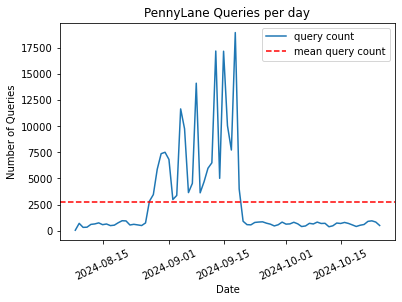

In [3]:
#Aggregate data to show searches per day
df['created_at'].dt.date.value_counts().plot(rot=25, title='PennyLane Queries per day')
plt.axhline(df['created_at'].dt.date.value_counts().mean(),c='r',ls='--')
plt.ylabel('Number of Queries')
plt.xlabel('Date')
plt.legend(['query count', 'mean query count']);

print('Searches per day:')
print(round(df['created_at'].dt.date.value_counts().describe()))

In [4]:
#Show top queries during the time of the search traffic spike.
df_peak = df.loc[(df['created_at'] >= '2024-08-27') & (df['created_at'] <= '2024-09-19')] 
print('Top searches during peak period:')
print(df_peak['query_text'].value_counts(dropna=False).rename_axis('Query').reset_index(name='Count').head())

#Show top queries outside of the time of the search traffic spike.
df_nonpeak = df.loc[(df['created_at'] < '2024-08-27') | (df['created_at'] > '2024-09-19')]
print('Top searches outside of peak period:')
print(df_nonpeak['query_text'].value_counts(dropna=False).rename_axis('Query').reset_index(name='Count').head())

Top searches during peak period:
            Query   Count
0             NaN  174394
1            test    3010
2             vqe      71
3            qaoa      66
4  neural network      37
Top searches outside of peak period:
     Query  Count
0      NaN  26534
1     test   4622
2  quantum    192
3     qaoa    178
4      vqe    143


Non-null searches per day:
count     79.0
mean     248.0
std       74.0
min       36.0
25%      196.0
50%      252.0
75%      293.0
max      482.0
Name: created_at, dtype: float64
Total non-null searches:  19596


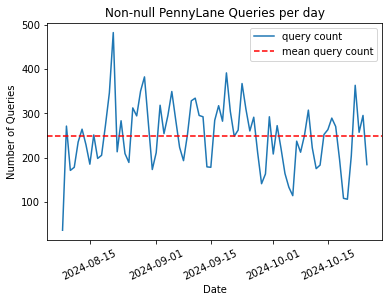

In [5]:
#create subset dataframe excluding nulls in the query text
df_text = df.dropna(subset=['query_text'])

#Aggregate data to show searches per day of non-null queries
df_text['created_at'].dt.date.value_counts().plot(rot=25, title='Non-null PennyLane Queries per day')
plt.axhline(df_text['created_at'].dt.date.value_counts().mean(),c='r',ls='--')
plt.ylabel('Number of Queries')
plt.xlabel('Date')
plt.legend(['query count', 'mean query count']);


print('Non-null searches per day:')
print(round(df_text['created_at'].dt.date.value_counts().describe()))
print('Total non-null searches: ', df_text.shape[0])

There was a significant increase in search traffic between late August to mid September. Looking more closely at what was being queried at this time, it appears searches containing text did not increase in the same way. I am unsure of what caused the spike in activity of null queries during this time, potentially site testing/development.

Removing the null queries brings the average queries per day down drastically from 2791 to 248. For the remainder of the analysis we will focus on queries containing text only.


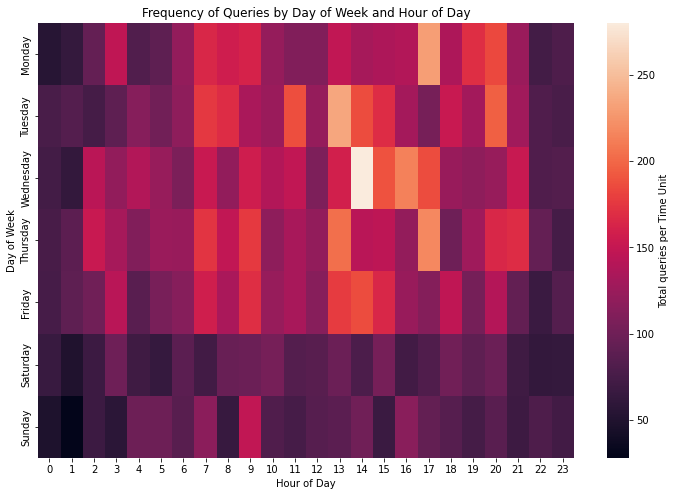

In [7]:
#import warnings
#warnings.filterwarnings('ignore')

df_text['day_of_week']=df_text['created_at'].dt.dayofweek
df_text['hour_of_day']=df_text['created_at'].dt.hour

search_counts = df_text.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)
search_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))
sns.heatmap(search_counts, cbar_kws={'label': 'Total queries per Time Unit'})
plt.title('Frequency of Queries by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

I will be assuming that the 'created_at' times are recorded in the local time zone of the user.
Here we see that the majority of queries are made during normal working hours - Monday to Friday, midday, suggesting that users of PennyLane are using it for work/school purposes.

## Demographics

Below we will explore the distribution of demographics amongst users making queries on PennyLane.ai/search. 

In [8]:
#Aggregate data to find percentage of users that log-in and use pennylane
df_text['survey'].value_counts(dropna=False, normalize=True).mul(100).round(2).astype(str) + '%'

NaN                          96.08%
{"uses_pennylane": true}      2.92%
{"uses_pennylane": false}      1.0%
Name: survey, dtype: object

96% of queries are done by users that are not signed in, thus we have little data about their specific roles. It may be useful to include features to encourage users to sign in/make accounts.

            persona_other  Count
0       Community manager     28
1         Xanadu employee      5
2  Senior Product Manager      3


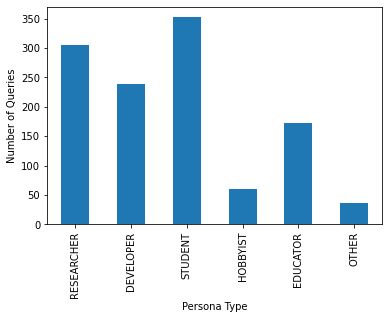

In [9]:
#Show distribution of personas 
#print(df_text['personas'].unique())
persona_types = ['RESEARCHER','DEVELOPER','STUDENT','HOBBYIST','EDUCATOR','OTHER']
df_personas = pd.DataFrame(persona_types,columns=['type'])
df_personas['counts']=[df_text['personas'].str.contains(x).sum() for x in persona_types]
df_personas.plot(kind='bar', x='type', legend=False)
plt.xlabel('Number of PennyLane Queries by Persona Type')
plt.xlabel('Persona Type')
plt.ylabel('Number of Queries')

#Show non-categorized personas
print(df_text['persona_other'].value_counts().rename_axis('persona_other').reset_index(name='Count'))

Text(0, 0.5, 'Percentage of queries')

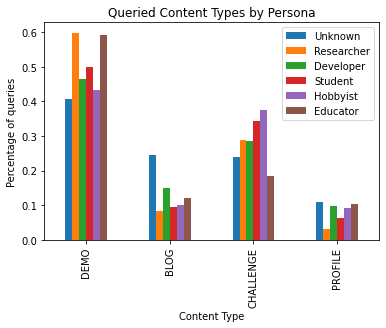

In [10]:
#create subset dataframes for various personas
df_researcher = df[df.personas.str.contains('RESEARCHER',na=False)]
df_developer = df[df.personas.str.contains('DEVELOPER',na=False)]
df_student = df[df.personas.str.contains('STUDENT',na=False)]
df_hobbyist = df[df.personas.str.contains('HOBBYIST',na=False)]
df_educator = df[df.personas.str.contains('EDUCATOR',na=False)]
#df_other = df[df.personas.str.contains("OTHER",na=False)] #choosing not to include 'other' personas as there are so few queries of this type.

content_types = ['DEMO','BLOG','CHALLENGE','PROFILE']
personas_df = [df_text,df_researcher,df_developer,df_student,df_hobbyist,df_educator]

#count occurances of querys filtered for each content type for each persona type
df_gen = pd.DataFrame(content_types,columns=['type'])
for dataframe in range(0,len(personas_df)):
    df_gen[dataframe]= [personas_df[dataframe]['query_content_types'].str.contains(x).sum() for x in content_types]
    df_gen[dataframe] = df_gen[dataframe]/df_gen[dataframe].sum()

#Show barplot of content types for each persona
df_gen.plot(kind='bar', x='type')
plt.legend(['Unknown','Researcher','Developer','Student','Hobbyist','Educator'])
plt.title('Queried Content Types by Persona')
plt.xlabel('Content Type')
plt.ylabel('Percentage of queries')

The highest number of queries are made by Students, Researchers, and Developers. If we focus on supporting Reasearchers, as they are a high value persona, we can see that researchers are most often looking for demos, roughly 60% of the time, when searching PennyLane.ai. Focusing on providing high quality demo webpages would likely improve user experience for Researchers. On the other hand, researchers appear to be uninterested in profile or blog posts, searching for those types of content less than 10% of the time.
For all groups, demos are most commonly searched for, therefore it may be beneficial to return them more often or closer to the top of the page for general queries without these filters on.

## Top Queries

We can now explore what is being queried to understand the users top interests.

In [11]:
#Count which text items were queried the most
print('General top queries:')
print(df_text['query_text'].value_counts().rename_axis('query_text').reset_index(name='Count').head(15))

print('Top queries of researchers:')
print(df_researcher['query_text'].value_counts().rename_axis('query_text').reset_index(name='Count').head(15))

General top queries:
                  query_text  Count
0                       test   7632
1                       qaoa    244
2                    quantum    228
3                        vqe    214
4                        qml    149
5     quantum neural network    113
6                variational    109
7   quantum machine learning    101
8                      torch     84
9                hamiltonian     81
10            neural network     80
11                      shor     78
12                       gpu     69
13          classical shadow     68
14                    kernel     68
Top queries of researchers:
                  query_text  Count
0        simulated annealing     12
1                       qaoa     11
2                hamiltonian      9
3             phase kickback      8
4                    qmldata      8
5               optimization      7
6   quantum machine learning      7
7                        gpu      7
8                   photonic      6
9              

Looking at the top searches (ignoring 'test'), we can see that most often users are searching for items such as 'Quantum approximate optimization algorithm (QAOA)', 'Quantum Machine Learning (QML)', and 'Hamiltonian'. Researchers are also often searching for those items, as well as 'Simulated Annealing', 'Phase Kick-back', and 'Optimization'.

Next we can order query results by the total results returned for the query in ascending order, and the number of times researchers have searched them, in descending order. These results give us an idea of what concepts users are interested in that are lacking resources on the PennyLane.ai website. 

In [12]:
#Show lowest 
df_totals=df_text.groupby(['query_text','total_results']).size().reset_index(name="count")
df_totals=df_totals.sort_values(['total_results', 'count'], ascending = [True, False])
print('Low result queries:')
print(df_totals.loc[df_totals['count'] > 1].head(20)) #exclude entries with only one query

print('Low result queries for researchers:')
df_totals_research=df_researcher.groupby(['query_text','total_results']).size().reset_index(name="count")
df_totals_research=df_totals_research.sort_values(['total_results', 'count'], ascending = [True, False])
print(df_totals_research.loc[df_totals_research['count'] > 1].head(15)) #exclude entries with only one query

Low result queries:
                           query_text  total_results  count
77                               alan              0     19
5486                              vqc              0     19
338                              bb84              0     10
447   building molecular hamiltonians              0      9
897                      cryptography              0      8
2881                              mqt              0      8
4421                             qubo              0      7
101                            alpine              0      6
261                       autoencoder              0      6
3568                              qkd              0      6
600                              cite              0      5
3726                             qpca              0      5
4584                               rl              0      5
5278                              tsp              0      5
1414                        federated              0      4
1656                

In general, there appear to be a fair number of searches for quantum cryptography related queries ('bb84','cryptography',qkd'), with zero returned results. Specifically for researchers there are more quantum hardware related queries such as 'photonics' or 'diamond'. It may be helpful for users if more resources on these topics were developed. 

Further, certain results suggest user typos, such as 'qaqo', where the user is likely looking for 'qaoa'. Indicating potential room for improvement in the software for typo suggestion.

As with many datasets, futher exploratory analysis could be done, including but not limited to: expanding the top queries analysis to include the users filters on content type (ie. see if diamond+BLOG is more often queried than diamond+DEMO), as well as explore sorting filters on queries, and understanding which result content id are shown the most.